#Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

#Loading Datasets

In [2]:
# Load datasets
rating_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings_df = pd.read_csv('ratings.dat', header=None, delimiter='::', names=rating_columns, engine='python')

user_columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users_df = pd.read_csv('users.dat', header=None, delimiter='::', names=user_columns, engine='python')

movie_columns = ['MovieID', 'Title', 'Genres']
movies_df = pd.read_csv('movies.dat', header=None, delimiter='::', names=movie_columns, engine='python', encoding='ISO-8859-1')



In [3]:
print(ratings_df.head())

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [4]:
print(ratings_df.shape)

(1000209, 4)


In [5]:
print(users_df.head())

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [6]:
print(users_df.shape)

(6040, 5)


In [7]:
print(movies_df.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [8]:
print(movies_df.shape)

(3883, 3)


#Merging the Datasets

In [9]:
# Merge ratings and users on 'UserID'
merged_data = pd.merge(ratings_df, users_df, on='UserID')

# Merge the result with movies on 'MovieID'
merged_data = pd.merge(merged_data, movies_df, on='MovieID')

# Display the first few rows of the merged dataset
print(merged_data.head())

   UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0       1     1193       5  978300760      F    1          10    48067   
1       2     1193       5  978298413      M   56          16    70072   
2      12     1193       4  978220179      M   25          12    32793   
3      15     1193       4  978199279      M   25           7    22903   
4      17     1193       5  978158471      M   50           1    95350   

                                    Title Genres  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama  


In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [11]:
merged_data.shape

(1000209, 10)

#Performing Correlational Analysis

<ipython-input-12-48d63790f956>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


Correlational Matrix:
              UserID   MovieID    Rating  Timestamp       Age  Occupation
UserID      1.000000 -0.017739  0.012303  -0.490383  0.034688   -0.026698
MovieID    -0.017739  1.000000 -0.064042   0.041632  0.027575    0.008585
Rating      0.012303 -0.064042  1.000000  -0.026770  0.056869    0.006753
Timestamp  -0.490383  0.041632 -0.026770   1.000000 -0.064562    0.015646
Age         0.034688  0.027575  0.056869  -0.064562  1.000000    0.078371
Occupation -0.026698  0.008585  0.006753   0.015646  0.078371    1.000000


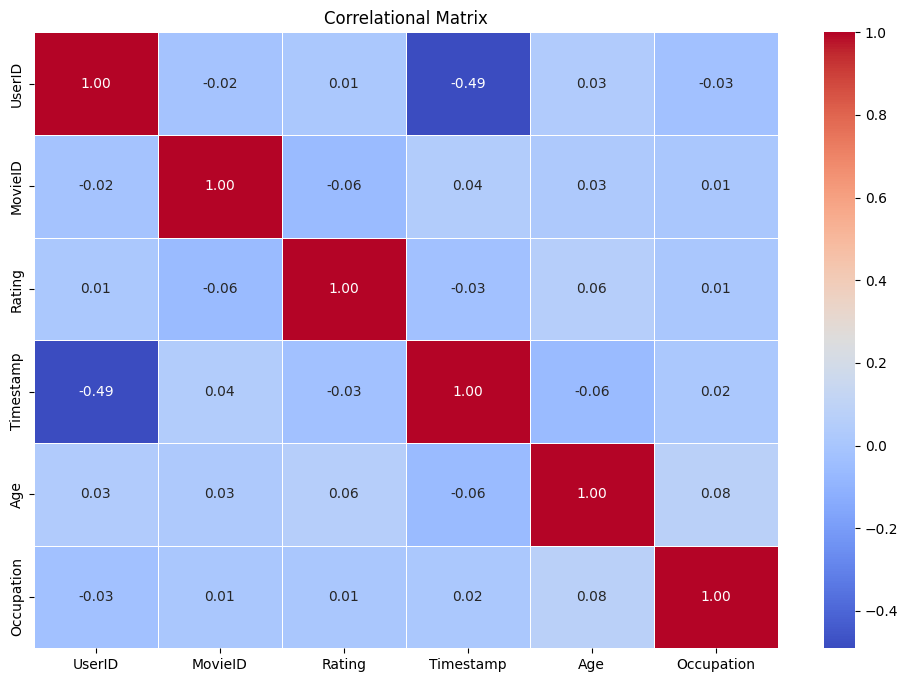

In [12]:
# Calculate the correlational matrix
correlation_matrix = merged_data.corr()

# Display the correlational matrix
print("Correlational Matrix:")
print(correlation_matrix)

# Visualize the correlational matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlational Matrix')
plt.show()

#Checking for Missing Data

In [13]:
# Check for missing values in the merged dataset
missing_values = merged_data.isnull().sum()

# Display columns with missing values and their counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


In [14]:
# Check for missing values in the entire merged dataset
na_values = merged_data.isnull().sum().sum()

# Display the total count of missing values in the entire DataFrame
print("Total NA values in the DataFrame:", na_values)

Total NA values in the DataFrame: 0


In [15]:
# Count unique values in each column of the merged dataset
unique_values = merged_data.nunique()

# Display the total number of unique values for each column
print("Total Unique Values in Each Column:")
print(unique_values)

Total Unique Values in Each Column:
UserID          6040
MovieID         3706
Rating             5
Timestamp     458455
Gender             2
Age                7
Occupation        21
Zip-code        3439
Title           3706
Genres           301
dtype: int64


#Visualizing User's Age Distribution

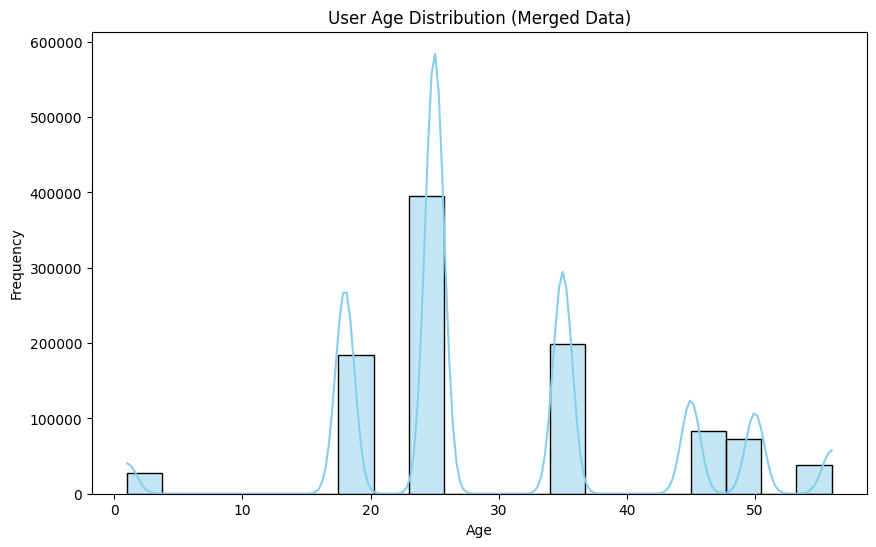

In [16]:
# Plotting the User Age Distribution from merged_data
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('User Age Distribution (Merged Data)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Visualization of User's Ratings for the movie "Toy Story"

In [17]:
# Get the names of movies with "Toy Story" in the title
toy_story_movie_names = merged_data[merged_data['Title'].str.contains('Toy Story')]['Title'].unique()

# Display the count and names
print(f'Total movies with "Toy Story" in the title: {len(toy_story_movie_names)}')
print('\nMovie Names:')
for movie_name in toy_story_movie_names:
    print(movie_name)

Total movies with "Toy Story" in the title: 2

Movie Names:
Toy Story (1995)
Toy Story 2 (1999)


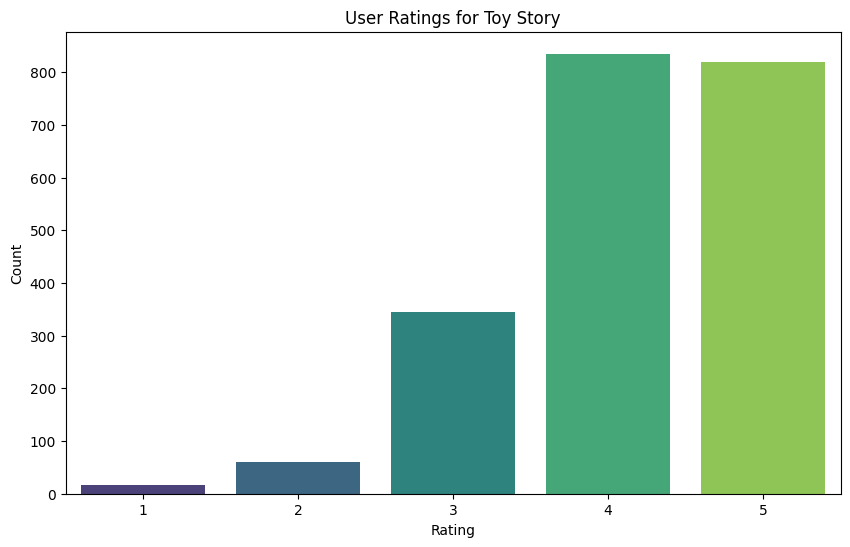

In [18]:
# Filter data for the movie "Toy Story (1995)"
toy_story_ratings = merged_data[merged_data['Title'] == 'Toy Story (1995)']

# Plotting User Ratings for "Toy Story"
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=toy_story_ratings, palette='viridis')
plt.title('User Ratings for Toy Story')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

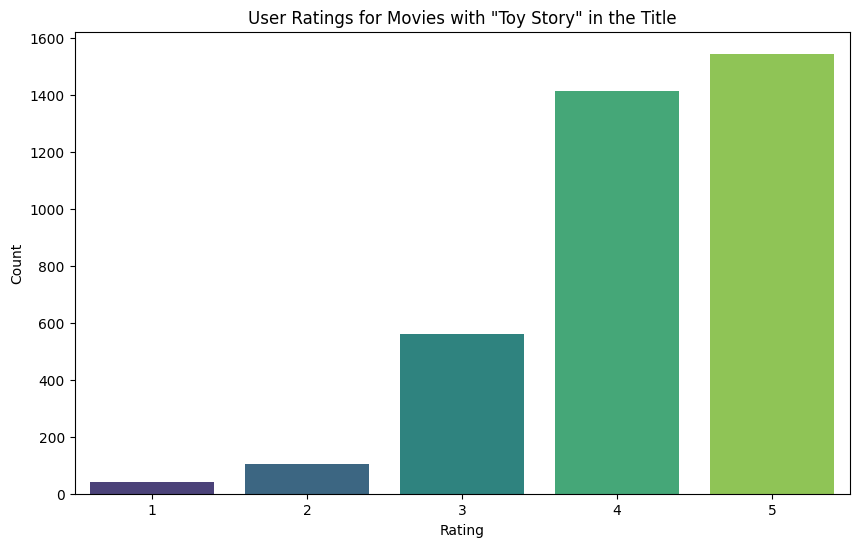

In [19]:
# Filter data for movies containing "Toy Story" in the title
toy_story_movies = merged_data[merged_data['Title'].str.contains('Toy Story')]

# Plotting User Ratings for movies with "Toy Story" in the title
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=toy_story_movies, palette='viridis')
plt.title('User Ratings for Movies with "Toy Story" in the Title')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#Top 25 Movies as per Viewership Ratings

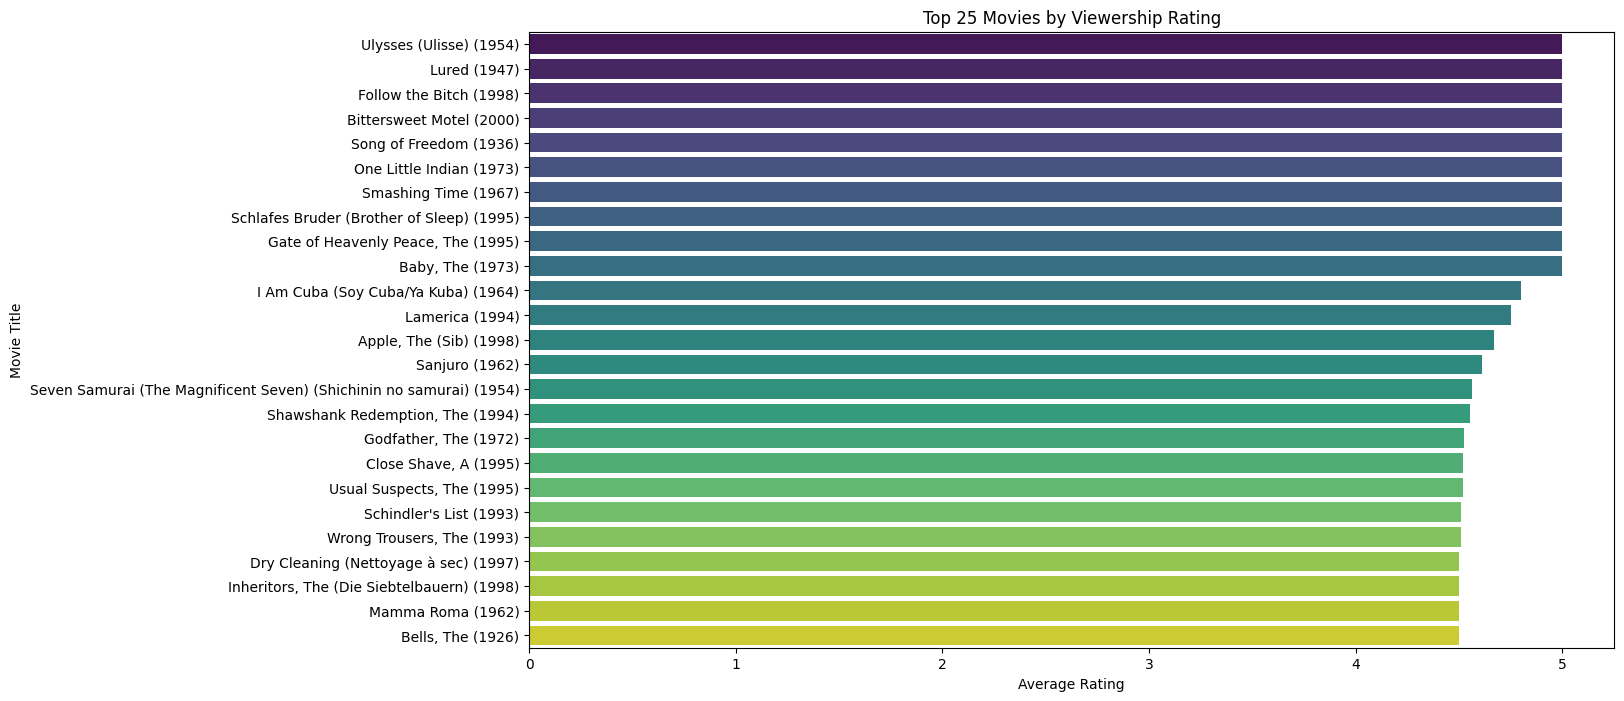

In [20]:
# Calculate the mean rating for each movie
movie_ratings = merged_data.groupby('Title')['Rating'].mean()

# Sort movies by mean rating in descending order and get the top 25
top_25_movies = movie_ratings.sort_values(ascending=False).head(25)

# Display the top 25 movies by viewership rating
plt.figure(figsize=(14, 8))
sns.barplot(x=top_25_movies.values, y=top_25_movies.index, palette='viridis')
plt.title('Top 25 Movies by Viewership Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

#Ratings of the Movies that are Reviewed by User having user id = 2696

In [21]:
# Filter data for user ID 2696
user_2696_ratings = merged_data[merged_data['UserID'] == 2696]

# Display the ratings for all movies reviewed by user ID 2696
print(f'Ratings for movies reviewed by User ID 2696:')
print(user_2696_ratings[['Title', 'Rating']])

Ratings for movies reviewed by User ID 2696:
                                                 Title  Rating
24345                        Back to the Future (1985)       2
29848                E.T. the Extra-Terrestrial (1982)       3
244232                        L.A. Confidential (1997)       4
250014                                Lone Star (1996)       5
273633                                      JFK (1991)       1
277808                 Talented Mr. Ripley, The (1999)       4
371178  Midnight in the Garden of Good and Evil (1997)       4
377250                                 Cop Land (1997)       3
598042                                 Palmetto (1998)       4
603189                        Perfect Murder, A (1998)       4
609204                                Game, The (1997)       4
611956          I Know What You Did Last Summer (1997)       2
612552                    Devil's Advocate, The (1997)       4
613486                                   Psycho (1998)       4
616546    

#Fetching Unique Genres

In [22]:
# Extract and concatenate all unique genres
all_genres = '|'.join(merged_data['Genres'].unique()).split('|')

# Get unique genres
unique_genres = set(all_genres)

# Display the unique genres
print("Unique Genres:")
for genre in unique_genres:
    print(genre)

Unique Genres:
Documentary
Horror
Sci-Fi
Thriller
Drama
Animation
Romance
Fantasy
War
Action
Adventure
Western
Film-Noir
Children's
Comedy
Musical
Mystery
Crime


#Using One-Hot Encoding, Creating Seperate Columns for Genres

In [23]:
# Create one-hot encoding for genres
genre_dummies = merged_data['Genres'].str.get_dummies(sep='|')

# Concatenate the one-hot encoding with the original dataframe
merged_data_one_hot = pd.concat([merged_data, genre_dummies], axis=1)

# Display the updated DataFrame with one-hot encoding
print("DataFrame with One-Hot Encoding:")
print(merged_data_one_hot.head())

DataFrame with One-Hot Encoding:
   UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0       1     1193       5  978300760      F    1          10    48067   
1       2     1193       5  978298413      M   56          16    70072   
2      12     1193       4  978220179      M   25          12    32793   
3      15     1193       4  978199279      M   25           7    22903   
4      17     1193       5  978158471      M   50           1    95350   

                                    Title Genres  ...  Fantasy  Film-Noir  \
0  One Flew Over the Cuckoo's Nest (1975)  Drama  ...        0          0   
1  One Flew Over the Cuckoo's Nest (1975)  Drama  ...        0          0   
2  One Flew Over the Cuckoo's Nest (1975)  Drama  ...        0          0   
3  One Flew Over the Cuckoo's Nest (1975)  Drama  ...        0          0   
4  One Flew Over the Cuckoo's Nest (1975)  Drama  ...        0          0   

   Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War

#Encoding Gender Column

In [24]:
# Simple mapping for 'Gender' column
gender_mapping = {'F': 0, 'M': 1}
merged_data_one_hot['Gender_Encoded'] = merged_data_one_hot['Gender'].map(gender_mapping)

In [25]:
# Display the columns in the merged dataset
print("Columns in the Merged Dataset:")
print(merged_data_one_hot.columns)

Columns in the Merged Dataset:
Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'Gender_Encoded'],
      dtype='object')


#Creating Seperate Columns for Occupation

In [26]:
merged_data_one_hot['Occupation'] = merged_data_one_hot['Occupation'].astype(str)

# Perform one-hot encoding for 'Occupation'
occupation_encoded = pd.get_dummies(merged_data_one_hot['Occupation'], prefix='Occupation')

# Concatenate the encoded features with the original DataFrame
merged_data_one_hot = pd.concat([merged_data_one_hot, occupation_encoded], axis=1)

# Display the updated DataFrame with one-hot encoded 'Occupation'
print("Updated DataFrame with one-hot encoded 'Occupation':")
print(merged_data_one_hot.head())


Updated DataFrame with one-hot encoded 'Occupation':
   UserID  MovieID  Rating  Timestamp Gender  Age Occupation Zip-code  \
0       1     1193       5  978300760      F    1         10    48067   
1       2     1193       5  978298413      M   56         16    70072   
2      12     1193       4  978220179      M   25         12    32793   
3      15     1193       4  978199279      M   25          7    22903   
4      17     1193       5  978158471      M   50          1    95350   

                                    Title Genres  ...  Occupation_19  \
0  One Flew Over the Cuckoo's Nest (1975)  Drama  ...              0   
1  One Flew Over the Cuckoo's Nest (1975)  Drama  ...              0   
2  One Flew Over the Cuckoo's Nest (1975)  Drama  ...              0   
3  One Flew Over the Cuckoo's Nest (1975)  Drama  ...              0   
4  One Flew Over the Cuckoo's Nest (1975)  Drama  ...              0   

   Occupation_2  Occupation_20  Occupation_3  Occupation_4  Occupation_5  \

In [27]:
print(merged_data_one_hot.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'Gender_Encoded',
       'Occupation_0', 'Occupation_1', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_2', 'Occupation_20', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9'],
      dtype='object')


#Selecting the Features and Deploying the LGBMClassifier Model

In [28]:
# Selecting relevant features
selected_features = ['Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
                     'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
                     'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
                     'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
                     'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
                     'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                     'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                     'Thriller', 'War', 'Western']

# Extract features and target variable
X = merged_data_one_hot[selected_features]
y = merged_data_one_hot['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

# Initialize the LGBMClassifier
lgb_classifier = LGBMClassifier(boosting_type='gbdt', n_jobs=-1, objective='multiclass', num_class=5)

# Fit the model on the training data
lgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_classifier.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('LGBM Classifier Accuracy Score:', accuracy * 100)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 800167, number of used features: 38
[LightGBM] [Info] Start training from score -2.879514
[LightGBM] [Info] Start training from score -2.229938
[LightGBM] [Info] Start training from score -1.342692
[LightGBM] [Info] Start training from score -1.052974
[LightGBM] [Info] Start training from score -1.486058
LGBM Classifier Accuracy Score: 36.11291628757961
